# Enter Student Name & ID

In [1]:
student_id = 400101967 #@param {type:"integer"}
student_name = "Ehsan Merrikhi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101967
your name: Ehsan Merrikhi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [13]:
def myPCA(X, num_components):
    # Center the data by subtracting the mean of each feature
    X_center = X - np.mean(X, axis=0)
    
    # Calculate the covariance matrix of the centered data
    X_cov = np.cov(X_center, rowvar=False)
    
    # Perform eigen decomposition of the covariance matrix
    # Use np.linalg.eigh since the covariance matrix is symmetric
    eigvals, eigvecs = np.linalg.eigh(X_cov)
    
    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sort_idx = np.argsort(eigvals)[::-1]
    sort_eigvecs = eigvecs[:, sort_idx]
    
    # Select the top 'num_components' eigenvectors
    selected_eigvecs = sort_eigvecs[:, :num_components]
    
    # Project the centered data onto the selected eigenvectors
    X_reduced = np.dot(X_center, selected_eigvecs)
    
    return X_reduced


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

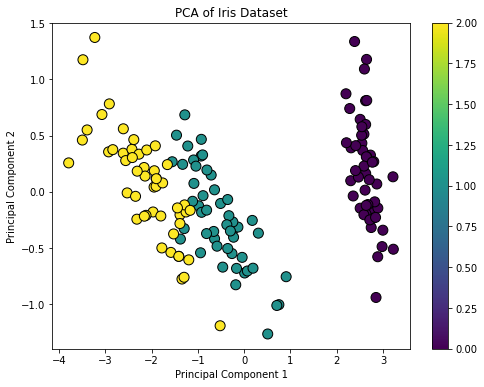

In [15]:
dataset = load_iris()
X = dataset.data
y = dataset.target

num_components = 2
X_reduced = myPCA(X, num_components=num_components)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

eigenfaces are the principal components derived from applying PCA to face images. 

They can be used to reduce the dimension of the data which is helpful in compressing.

They can be used in face recognition.

They can also be used in decomposing images.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [16]:
import cv2 as cv
import os

# img loader
def load_images():
    data_path = './ORL'
    train_images = []
    y_train = []
    test_images = []
    y_test = []
    for i in range(1, 41):
        folder_path = os.path.join(data_path, f's{i}')
        images = [cv.imread(os.path.join(folder_path, f'{j}.bmp'), cv.IMREAD_GRAYSCALE) for j in range(1, 11)]
        train_images.extend(images[:5])
        test_images.extend(images[5:])

        y_train.extend([i] * 5)
        y_test.extend([i] * 5)

    return train_images, test_images, y_train, y_test

# Load images
train_images, test_images, y_train, y_test = load_images()

# Preprocess images
train_images = [img.flatten() for img in train_images]
test_images = [img.flatten() for img in test_images]

# Convert to numpy arrays
X_train = np.array(train_images)
X_test = np.array(test_images)
y_train = np.array(y_train)
y_test = np.array(y_test)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [17]:
from sklearn.decomposition import PCA

num_components = 45
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

model = LDA()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?

**I think around 50 features should be enough since we have 40 persons so we assume some extra features in case**

In [19]:
model = LDA()
acc = []
for num_components in range(40, 100):
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc.append(accuracy_score(y_true=y_test, y_pred=y_pred))



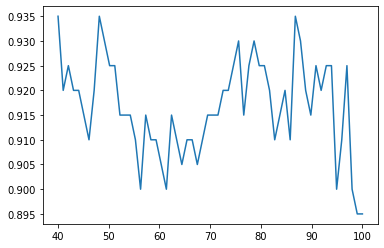

In [20]:
num_components = np.linspace(40,100,60)
plt.plot(num_components, acc)
